In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import os
from typing import TypedDict
from pathlib import Path
import pandas as pd
import seaborn as sns

from paw_ood_pixel_error_simple import build_ensemble, plot, Ensemble, color_mapping

In [3]:
ood = Ensemble()
ood.data_to_plot = {}
output_dir = "fuse_outputs/chickadee/cropzoom/"

for i in range(5):
    key = f"v0.{i}.1"
    value = output_dir + f"detector_{i}/image_preds/CollectedData_merged_new.csv/predictions.csv"
    ood.data_to_plot[key] = value

    key = f"v1.{i}.1"
    value = output_dir + f"pose_supervised_{i}/image_preds/cropped_CollectedData_merged_new.csv/remapped_predictions.csv"
    ood.data_to_plot[key] = value
    """
    key = f"v2.{i}.1"
    value = output_dir + f"pose_ctx_{i}/image_preds/cropped_CollectedData_merged_new.csv/remapped_predictions.csv"
    ood.data_to_plot[key] = value
    """

build_ensemble(ood)


No NaN values detected in preds array.
Stddevs: [[20.27033018 19.35534264 24.85292734 ...  6.31227149  4.6556646
   5.24671659]
 [13.37307123 13.06700206 12.90486186 ...  5.7329112   4.99987379
   5.507832  ]
 [ 4.51883526  4.25814757  4.05246528 ...  8.99243797  7.18251053
   6.6966871 ]
 ...
 [ 5.94287618  6.34052119  2.99743671 ... 11.0419258   6.55318041
   6.30929018]
 [ 4.59414262  4.68385132  4.54334774 ...  6.37376554  7.43306555
  10.9668123 ]
 [ 7.43099529  9.28644248  4.42627042 ... 11.05485734  5.73362263
   9.54584103]]
Total pixel error for model v0.0.1: 360455.42273296305
Total pixel error for model v1.0.1: 309067.40741807385
Total pixel error for model v0.1.1: 374877.33987799013
Total pixel error for model v1.1.1: 308791.869496769
Total pixel error for model v0.2.1: 355672.2605598812
Total pixel error for model v1.2.1: 295944.7283319135
Total pixel error for model v0.3.1: 349504.0799309791
Total pixel error for model v1.3.1: 312186.1778562232
Total pixel error for model

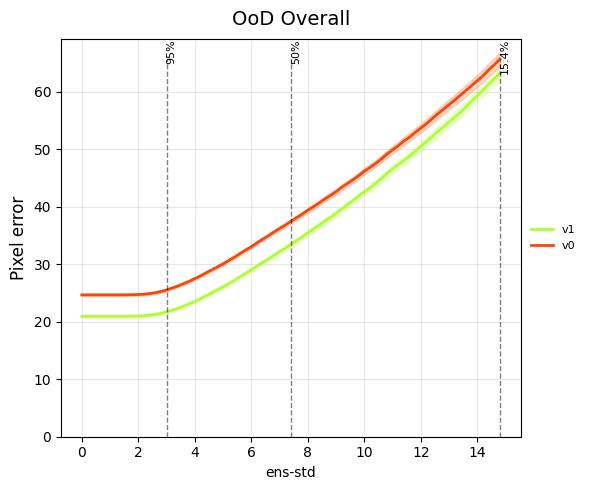

In [4]:
from paw_ood_pixel_error_simple import plot, Ensemble, color_mapping
ensembles: list[Ensemble] = [ood]

import itertools
for ind_ood, seed, model_type in itertools.product(range(2), range(5), range(3)):
    if model_type == 0:
        color = color_mapping["v0"]
    elif model_type == 1:
        color = "green" # color_mapping["v1"]
    else:
        color = color_mapping["v2"]
    color_mapping[f"v{model_type}.{seed}.{ind_ood}"] = color

fig, axes = plt.subplots(
    ncols=len(ensembles),
    nrows=1,
    figsize=(6 * len(ensembles), 5),
    sharey="row",
)
ens = ood
models_to_plot = list(ens.data_to_plot.keys())
df_line2 = ens.df_line2
n_points_dict = ens.n_points_dict
std_vals = ens.std_vals

ax = axes
plot(ax, ens, models_to_plot, "OoD")

plt.tight_layout()
plt.show()